<a href="https://colab.research.google.com/github/Jairzaoo/ProjetoIntegrador/blob/main/Projeto_integrador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ordenaçao dos dados

In [ ]:
import pandas as pd

def ordenar_dados_por_data(arquivo_entrada_url, arquivo_saida):
    """
    Lê um arquivo CSV de uma URL, ordena os dados pela coluna de tempo e salva em um novo arquivo local.

    Args:
        arquivo_entrada_url (str): A URL do arquivo CSV a ser lido.
        arquivo_saida (str): O nome do arquivo CSV local onde os dados ordenados serão salvos.
    """
    try:
        # Lê o arquivo CSV diretamente da URL, usando ';' como separador
        print(f"Lendo o arquivo da URL...")
        df = pd.read_csv(arquivo_entrada_url, sep=';')

        # A primeira coluna é a de tempo. Vamos usá-la para a ordenação.
        coluna_tempo = df.columns[0]

        # Converte a coluna de tempo para o formato datetime para garantir a ordenação correta.
        # 'dayfirst=True' trata formatos como DD/MM/YYYY.
        # 'errors='coerce'' transforma qualquer data inválida em Nulo (NaT).
        print("Convertendo a coluna de data e hora...")
        df[coluna_tempo] = pd.to_datetime(df[coluna_tempo], dayfirst=True, errors='coerce')

        # Remove linhas que possam ter tido datas inválidas
        df.dropna(subset=[coluna_tempo], inplace=True)

        # Remove registros duplicados que possam existir
        df.drop_duplicates(inplace=True)

        # A etapa principal: ordena o DataFrame pela coluna de tempo
        print("Ordenando os dados...")
        df_ordenado = df.sort_values(by=coluna_tempo, ascending=True)

        # Salva o DataFrame ordenado em um novo arquivo CSV no ambiente do Colab
        print(f"Salvando os dados ordenados em '{arquivo_saida}'...")
        df_ordenado.to_csv(arquivo_saida, sep=';', index=False)

        print("-" * 30)
        print("Operação concluída com sucesso!")
        print(f"Linhas lidas da URL: {len(df)}")
        print(f"Arquivo de saída: {arquivo_saida} ({len(df_ordenado)} linhas salvas)")
        print("\nPara baixar o arquivo gerado, procure por ele no painel de arquivos à esquerda.")

    except Exception as e:
        print(f"Ocorreu um erro inesperado: {e}")
        print("Possíveis causas: a URL está incorreta ou o compartilhamento do arquivo no Google Drive não está como 'Qualquer pessoa com o link'.")

# --- Configuração ---
# O link do seu arquivo no Google Drive
link_original = 'https://drive.google.com/file/d/1__YuET48tGXHqZOuIRpg_0pw4rrnZ70-/view?usp=sharing'

# Convertendo para um link de download direto
id_arquivo = '1__YuET48tGXHqZOuIRpg_0pw4rrnZ70-'
url_de_entrada = f'https://drive.google.com/uc?export=download&id={id_arquivo}'

# Nome do arquivo que será salvo no ambiente do Colab após a ordenação
arquivo_de_saida_ordenado = 'dados_consolidados_ordenados.csv'
# --------------------

# Executa a função
ordenar_dados_por_data(url_de_entrada, arquivo_de_saida_ordenado)

Lendo o arquivo da URL...
Convertendo a coluna de data e hora...
Ordenando os dados...
Salvando os dados ordenados em 'dados_consolidados_ordenados.csv'...
------------------------------
Operação concluída com sucesso!
Linhas lidas da URL: 11989
Arquivo de saída: dados_consolidados_ordenados.csv (11989 linhas salvas)

Para baixar o arquivo gerado, procure por ele no painel de arquivos à esquerda.


## Processamento de dados: Remover coluna e extrair componentes de tempo

### Subtask:
Carregar o arquivo CSV (`dados_consolidados_ordenados.csv`), remover a coluna 'Working Mode' e extrair ano, mês, dia, hora e minuto da coluna 'Time' com o formato `YYYY-DD-MM HH:MM:SS`.

In [ ]:
import pandas as pd

# Nome do arquivo de entrada
arquivo_entrada = 'dados_consolidados_ordenados.csv'

# Nome do arquivo de saída para os dados processados
arquivo_saida_limpos = 'dados_limpos.csv'

try:
    # Carregar o arquivo CSV
    print(f"Lendo o arquivo '{arquivo_entrada}'...")
    df_processado = pd.read_csv(arquivo_entrada, sep=';')

    # Verificar se a coluna 'Working Mode' existe e removê-la
    if 'Working Mode' in df_processado.columns:
        df_processado.drop('Working Mode', axis=1, inplace=True)
        print("Coluna 'Working Mode' removida.")
    else:
        print("A coluna 'Working Mode' não foi encontrada no arquivo.")

    # Converter a coluna 'Time' para datetime com o formato especificado YYYY-DD-MM HH:MM:SS
    coluna_tempo = df_processado.columns[0] # Assumindo que 'Time' é a primeira coluna
    print(f"Convertendo a coluna '{coluna_tempo}' para datetime...")
    df_processado[coluna_tempo] = pd.to_datetime(df_processado[coluna_tempo], format='%Y-%d-%m %H:%M:%S', errors='coerce')

    # Remover linhas com valores inválidos na coluna 'Time' após a conversão
    initial_rows = df_processado.shape[0]
    df_processado.dropna(subset=[coluna_tempo], inplace=True)
    rows_after_dropna = df_processado.shape[0]
    if initial_rows - rows_after_dropna > 0:
        print(f"Removidas {initial_rows - rows_after_dropna} linhas com valores inválidos na coluna '{coluna_tempo}'.")

    # Extrair componentes de tempo
    if coluna_tempo in df_processado.columns:
        df_processado['Year'] = df_processado[coluna_tempo].dt.year
        df_processado['Month'] = df_processado[coluna_tempo].dt.month
        df_processado['Day'] = df_processado[coluna_tempo].dt.day
        df_processado['Hour'] = df_processado[coluna_tempo].dt.hour
        df_processado['Minute'] = df_processado[coluna_tempo].dt.minute
        print("Componentes de tempo (Ano, Mês, Dia, Hora, Minuto) extraídos.")

        # Remover a coluna 'Time' original após extrair os componentes
        df_processado.drop(coluna_tempo, axis=1, inplace=True)
        print(f"Coluna '{coluna_tempo}' removida.")

    else:
        print("Erro: Coluna 'Time' não disponível para extrair componentes de tempo.")

    # Renomear colunas conforme solicitado
    print("Renomeando colunas...")
    df_processado.rename(columns={
        'Year': 'Ano',
        'Month': 'Mês',
        'Day': 'Dia',
        'Hour': 'Hora',
        'Minute': 'Minuto',
        'Total Generation(kWh)': 'Geracao Total(kWh)'
    }, inplace=True)
    print("Colunas renomeadas.")

    # Salvar o DataFrame processado em um novo arquivo CSV
    print(f"Salvando os dados processados em '{arquivo_saida_limpos}'...")
    df_processado.to_csv(arquivo_saida_limpos, sep=';', index=False)
    print(f"Arquivo '{arquivo_saida_limpos}' criado com sucesso.")


    # Exibir as primeiras linhas e informações do DataFrame processado
    print("\nDataFrame processado:")
    display(df_processado.head())
    display(df_processado.info())

except FileNotFoundError:
    print(f"Erro: O arquivo '{arquivo_entrada}' não foi encontrado.")
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")

Lendo o arquivo 'dados_consolidados_ordenados.csv'...
Coluna 'Working Mode' removida.
Convertendo a coluna 'Time' para datetime...
Componentes de tempo (Ano, Mês, Dia, Hora, Minuto) extraídos.
Coluna 'Time' removida.
Renomeando colunas...
Colunas renomeadas.
Salvando os dados processados em 'dados_limpos.csv'...
Arquivo 'dados_limpos.csv' criado com sucesso.

DataFrame processado:


,Power(W),Geracao Total(kWh),Ano,Mês,Dia,Hora,Minuto
0,0,165072.8,2025,8,1,6,29
1,0,165072.8,2025,8,1,6,29
2,0,165072.8,2025,8,1,6,33
3,0,165072.8,2025,8,1,6,34
4,0,165072.8,2025,8,1,6,35


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11989 entries, 0 to 11988
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Power(W)            11989 non-null  int64  
 1   Geracao Total(kWh)  11989 non-null  float64
 2   Ano                 11989 non-null  int32  
 3   Mês                 11989 non-null  int32  
 4   Dia                 11989 non-null  int32  
 5   Hora                11989 non-null  int32  
 6   Minuto              11989 non-null  int32  
dtypes: float64(1), int32(5), int64(1)
memory usage: 421.6 KB


None

## Carregar os dados limpos

### Subtask:
Carregar o arquivo CSV (`dados_limpos.csv`) em um DataFrame pandas. Este arquivo já contém as colunas 'Ano', 'Mês', 'Dia', 'Hora', 'Minuto' e 'Geracao Total(kWh)', além de 'Power(W)'.


In [ ]:
# Importa a biblioteca pandas
import pandas as pd

# Carrega o arquivo CSV 'dados_limpos.csv' em um DataFrame, usando ';' como separador
df_ml = pd.read_csv('dados_limpos.csv', sep=';')

# Exibe as primeiras linhas do DataFrame carregado
display(df_ml.head())

# Exibe informações sobre o DataFrame (tipos de dados, valores não nulos)
display(df_ml.info())

,Power(W),Geracao Total(kWh),Ano,Mês,Dia,Hora,Minuto
0,0,165072.8,2025,8,1,6,29
1,0,165072.8,2025,8,1,6,29
2,0,165072.8,2025,8,1,6,33
3,0,165072.8,2025,8,1,6,34
4,0,165072.8,2025,8,1,6,35


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11989 entries, 0 to 11988
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Power(W)            11989 non-null  int64  
 1   Geracao Total(kWh)  11989 non-null  float64
 2   Ano                 11989 non-null  int64  
 3   Mês                 11989 non-null  int64  
 4   Dia                 11989 non-null  int64  
 5   Hora                11989 non-null  int64  
 6   Minuto              11989 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 655.8 KB


None

## Separar features e target

### Subtask:
Definir 'Power(W)' como a variável alvo (y) e as outras colunas relevantes ('Ano', 'Mês', 'Dia', 'Hora', 'Minuto', 'Geracao Total(kWh)') como features (X).


In [ ]:
# Define a coluna 'Power(W)' como a variável alvo (y)
y = df_ml['Power(W)']

# Define as outras colunas como as features (X)
X = df_ml[['Ano', 'Mês', 'Dia', 'Hora', 'Minuto', 'Geracao Total(kWh)']]

# Imprime mensagens de confirmação
print("Variável alvo (y) definida.")
# Exibe as primeiras linhas da variável alvo
display(y.head())

print("\nFeatures (X) definidas.")
# Exibe as primeiras linhas das features
display(X.head())

Variável alvo (y) definida.


,Power(W)
0,0
1,0
2,0
3,0
4,0



Features (X) definidas.


,Ano,Mês,Dia,Hora,Minuto,Geracao Total(kWh)
0,2025,8,1,6,29,165072.8
1,2025,8,1,6,29,165072.8
2,2025,8,1,6,33,165072.8
3,2025,8,1,6,34,165072.8
4,2025,8,1,6,35,165072.8


## Dividir os dados

### Subtask:
Dividir os conjuntos de features (X) e target (y) em conjuntos de treino e teste para treinar e avaliar o modelo de forma justa.


In [ ]:
# Importa a função train_test_split do scikit-learn
from sklearn.model_selection import train_test_split

# Divide os dados em conjuntos de treino e teste
# test_size=0.25 significa que 25% dos dados serão usados para teste e 75% para treino
# random_state=42 garante que a divisão seja a mesma sempre que o código for executado (reprodutibilidade)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Imprime as formas (número de linhas e colunas) dos conjuntos resultantes
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (8991, 6)
Forma de X_test: (2998, 6)
Forma de y_train: (8991,)
Forma de y_test: (2998,)


## Escalonamento de features (parcial)

### Subtask:
Aplicar escalonamento (como `StandardScaler`) apenas nas features numéricas que se beneficiam disso, como 'Geracao Total(kWh)', 'Ano', 'Mês' e 'Dia'. É crucial *não* escalar 'Hora' e 'Minuto', pois são valores discretos de tempo.


In [ ]:
# Importa o StandardScaler do scikit-learn
from sklearn.preprocessing import StandardScaler

# Identifica as colunas a serem escalonadas e as que não serão
cols_to_scale = ['Geracao Total(kWh)', 'Ano', 'Mês', 'Dia']
cols_not_to_scale = ['Hora', 'Minuto'] # Hora e Minuto não devem ser escalonados

# Instancia o StandardScaler
scaler = StandardScaler()

# Ajusta (fit) e transforma (transform) o scaler nos dados de treino para as colunas a serem escalonadas
X_train_scaled_part = scaler.fit_transform(X_train[cols_to_scale])

# Transforma os dados de teste para as colunas a serem escalonadas usando o scaler ajustado nos dados de treino
X_test_scaled_part = scaler.transform(X_test[cols_to_scale])

# Converte os arrays escalonados de volta para DataFrames
# Preserva o índice original dos DataFrames de treino e teste
X_train_scaled_part = pd.DataFrame(X_train_scaled_part, columns=cols_to_scale, index=X_train.index)
X_test_scaled_part = pd.DataFrame(X_test_scaled_part, columns=cols_to_scale, index=X_test.index)

# Combina as colunas escalonadas com as colunas não escalonadas para o conjunto de treino
# Usa axis=1 para concatenar colunas
X_train_scaled = pd.concat([X_train_scaled_part, X_train[cols_not_to_scale]], axis=1)

# Combina as colunas escalonadas com as colunas não escalonadas para o conjunto de teste
# Usa axis=1 para concatenar colunas
X_test_scaled = pd.concat([X_test_scaled_part, X_test[cols_not_to_scale]], axis=1)

# Garante que a ordem das colunas seja consistente (opcional, mas boa prática)
# Reordena as colunas para que fiquem na mesma ordem que as colunas originais (X)
X_train_scaled = X_train_scaled[X.columns]
X_test_scaled = X_test_scaled[X.columns]

# Imprime mensagem de conclusão e exibe as primeiras linhas dos DataFrames escalonados
print("Escalonamento e combinação dos dados completos.")
display(X_train_scaled.head())
display(X_test_scaled.head())

Escalonamento e combinação dos dados completos.


,Ano,Mês,Dia,Hora,Minuto,Geracao Total(kWh)
5735,0.0,1.100399,-0.212396,16,51,1.213186
3194,0.0,1.100399,-1.054890,15,48,0.997769
6492,0.0,1.100399,0.068435,17,22,1.283477
11973,0.0,-0.515160,1.472592,17,49,-0.283544
5322,0.0,1.100399,-0.212396,9,57,1.159647


,Ano,Mês,Dia,Hora,Minuto,Geracao Total(kWh)
396,0.0,1.100399,-1.616553,8,30,0.819287
2955,0.0,1.100399,-1.054890,11,49,0.962337
3647,0.0,-0.515160,-0.774059,11,38,-0.735252
357,0.0,1.100399,-1.616553,7,51,0.816430
1323,0.0,-0.515160,-1.335722,14,26,-0.825997


## Treinamento do modelo

### Subtask:
Selecionar um modelo de regressão adequado (por exemplo, RandomForestRegressor, que funcionou razoavelmente bem antes) e treiná-lo usando os dados de treino (X_train e y_train), onde apenas as features apropriadas foram escalonadas.


In [ ]:
# Importa o RandomForestRegressor do scikit-learn
from sklearn.ensemble import RandomForestRegressor

# Instancia o modelo RandomForestRegressor
# n_estimators=100 define o número de árvores na floresta
# random_state=42 para reprodutibilidade dos resultados
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Treina o modelo usando os dados de treino escalonados e a variável alvo
print("Treinando o modelo RandomForestRegressor...")
rf_model.fit(X_train_scaled, y_train)
print("Treinamento do modelo completo.")

# O modelo treinado é armazenado na variável 'rf_model'

Treinando o modelo RandomForestRegressor...
Treinamento do modelo completo.


## Avaliação do modelo

### Subtask:
Avaliar o desempenho do modelo treinado no conjunto de teste (X_test e y_test) usando métricas de regressão.


In [ ]:
# Importa as métricas de avaliação de regressão do scikit-learn
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Faz previsões no conjunto de teste escalonado usando o modelo treinado
y_pred = rf_model.predict(X_test_scaled)

# Calcula e imprime as métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erro Absoluto Médio (MAE): {mae}")
print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"R-quadrado (R2): {r2}")

Erro Absoluto Médio (MAE): 1047.0631130753839
Erro Quadrático Médio (MSE): 9616326.170428405
R-quadrado (R2): 0.9297992753913734


## Predição para identificar o melhor horário

### Subtask:
Criar um conjunto de dados simulado que cubra todos os minutos de um dia típico. Para este conjunto simulado, usar os valores médios ou mais frequentes das outras features ('Geracao Total(kWh)', 'Ano', 'Mês', 'Dia'). Aplicar o *mesmo* escalonamento parcial (apenas para 'Geracao Total(kWh)', 'Ano', 'Mês', 'Dia') a este conjunto simulado. Usar o modelo treinado para prever 'Power(W)' para cada minuto simulado.


In [ ]:
import numpy as np
import pandas as pd

# 1. Cria um DataFrame para todos os minutos de um dia
hours = np.arange(24)
minutes = np.arange(60)
simulated_times_data = {'Hora': [], 'Minuto': []}

for hour in hours:
    for minute in minutes:
        simulated_times_data['Hora'].append(hour)
        simulated_times_data['Minuto'].append(minute)

simulated_times = pd.DataFrame(simulated_times_data)

# 2. Preenche outras colunas com valores médios ou mais frequentes de X_train
# Calcula a média para cada coluna necessária em X_train
mean_geracao_total = X_train['Geracao Total(kWh)'].mean()
mean_ano = X_train['Ano'].mean()
mean_mes = X_train['Mês'].mean()
mean_dia = X_train['Dia'].mean()

# Preenche o DataFrame simulated_times com esses valores médios
simulated_times['Geracao Total(kWh)'] = mean_geracao_total
simulated_times['Ano'] = mean_ano
simulated_times['Mês'] = mean_mes
simulated_times['Dia'] = mean_dia

# Garante que a ordem das colunas corresponda à de X_train para consistência antes do escalonamento
simulated_times = simulated_times[['Ano', 'Mês', 'Dia', 'Hora', 'Minuto', 'Geracao Total(kWh)']]

# 3. Identifica as colunas a serem escalonadas (mesmas usadas para X_train)
# A ordem AQUI DEVE corresponder à ordem usada ao ajustar (fit) o scaler na célula ac7e8af0
cols_to_scale = ['Geracao Total(kWh)', 'Ano', 'Mês', 'Dia']
cols_not_to_scale = ['Hora', 'Minuto'] # Hora e Minuto não devem ser escalonados

# Garante que a ordem das colunas a serem escalonadas nos dados simulados corresponda à ordem em cols_to_scale
simulated_times_to_scale = simulated_times[cols_to_scale]


# 4. Aplica o *mesmo* scaler ajustado nos dados de treino aos dados simulados
# Usa o scaler *já ajustado* para transformar as colunas selecionadas
simulated_times_scaled_part = scaler.transform(simulated_times_to_scale)

# Converte o array escalonado de volta para um DataFrame
simulated_times_scaled_part = pd.DataFrame(simulated_times_scaled_part, columns=cols_to_scale, index=simulated_times.index)

# 5. Combina as colunas escalonadas com as colunas não escalonadas para o conjunto simulado
# Mantém as colunas originais não escalonadas 'Hora' e 'Minuto'
simulated_times_not_scaled = simulated_times[cols_not_to_scale]

# Combina as partes escalonadas e não escalonadas
simulated_times_scaled = pd.concat([simulated_times_scaled_part, simulated_times_not_scaled], axis=1)

# Garante que a ordem das colunas corresponda à de X_train_scaled usada para o treinamento
simulated_times_scaled = simulated_times_scaled[X_train_scaled.columns]

# 6. Usa o modelo treinado para prever 'Power(W)' para os dados simulados
print("Prevendo Power(W) para horários simulados...")
simulated_times['Predicted_Power(W)'] = rf_model.predict(simulated_times_scaled)
print("Predição completa.")

# Exibe os dados simulados com previsões
print("\nHorários simulados com Power(W) previsto:")
display(simulated_times.head())
display(simulated_times.tail())

Prevendo Power(W) para horários simulados...
Predição completa.

Horários simulados com Power(W) previsto:


,Ano,Mês,Dia,Hora,Minuto,Geracao Total(kWh),Predicted_Power(W)
0,2025.0,8.318874,6.756312,0,0,168163.103526,0.0
1,2025.0,8.318874,6.756312,0,1,168163.103526,0.0
2,2025.0,8.318874,6.756312,0,2,168163.103526,0.0
3,2025.0,8.318874,6.756312,0,3,168163.103526,0.0
4,2025.0,8.318874,6.756312,0,4,168163.103526,0.0


,Ano,Mês,Dia,Hora,Minuto,Geracao Total(kWh),Predicted_Power(W)
1435,2025.0,8.318874,6.756312,23,55,168163.103526,0.0
1436,2025.0,8.318874,6.756312,23,56,168163.103526,0.0
1437,2025.0,8.318874,6.756312,23,57,168163.103526,0.0
1438,2025.0,8.318874,6.756312,23,58,168163.103526,0.0
1439,2025.0,8.318874,6.756312,23,59,168163.103526,0.0


In [ ]:
import numpy as np

# 1. Cria um DataFrame para todos os minutos de um dia
hours = np.arange(24)
minutes = np.arange(60)
simulated_times_data = {'Hora': [], 'Minuto': []}

for hour in hours:
    for minute in minutes:
        simulated_times_data['Hora'].append(hour)
        simulated_times_data['Minuto'].append(minute)

simulated_times = pd.DataFrame(simulated_times_data)

# 2. Preenche outras colunas com valores médios ou mais frequentes de X_train
# Calcula a média para cada coluna necessária em X_train
mean_geracao_total = X_train['Geracao Total(kWh)'].mean()
mean_ano = X_train['Ano'].mean()
mean_mes = X_train['Mês'].mean()
mean_dia = X_train['Dia'].mean()

# Preenche o DataFrame simulated_times com esses valores médios
simulated_times['Geracao Total(kWh)'] = mean_geracao_total
simulated_times['Ano'] = mean_ano
simulated_times['Mês'] = mean_mes
simulated_times['Dia'] = mean_dia

# Garante que a ordem das colunas corresponda à de X_train para consistência antes do escalonamento
# ESTE PASSO NÃO É NECESSÁRIO PARA O ESCALONAMENTO, REORDENAREI APÓS O ESCALONAMENTO
# simulated_times = simulated_times[['Ano', 'Mês', 'Dia', 'Hora', 'Minuto', 'Geracao Total(kWh)']]

# 3. Identifica as colunas a serem escalonadas (mesmas usadas para X_train)
# A ordem AQUI DEVE corresponder à ordem usada ao ajustar (fit) o scaler na célula ac7e8af0
cols_to_scale = ['Geracao Total(kWh)', 'Ano', 'Mês', 'Dia']
cols_not_to_scale = ['Hora', 'Minuto'] # Hora e Minuto não devem ser escalonados

# Garante que a ordem das colunas a serem escalonadas nos dados simulados corresponda à ordem em cols_to_scale
simulated_times_to_scale = simulated_times[cols_to_scale]


# 4. Aplica o *mesmo* scaler ajustado nos dados de treino aos dados simulados
# Usa o scaler *já ajustado* para transformar as colunas selecionadas
simulated_times_scaled_part = scaler.transform(simulated_times_to_scale)

# Converte o array escalonado de volta para um DataFrame
simulated_times_scaled_part = pd.DataFrame(simulated_times_scaled_part, columns=cols_to_scale, index=simulated_times.index)

# 5. Combina as colunas escalonadas com as colunas não escalonadas para o conjunto simulado
# Mantém as colunas originais não escalonadas 'Hora' e 'Minuto'
simulated_times_not_scaled = simulated_times[cols_not_to_scale]

# Combina as partes escalonadas e não escalonadas
simulated_times_scaled = pd.concat([simulated_times_scaled_part, simulated_times_not_scaled], axis=1)

# Garante que a ordem das colunas corresponda à de X_train_scaled usada para o treinamento
simulated_times_scaled = simulated_times_scaled[X_train_scaled.columns]

# 6. Usa o modelo treinado para prever 'Power(W)' para os dados simulados
print("Prevendo Power(W) para horários simulados...")
simulated_times['Predicted_Power(W)'] = rf_model.predict(simulated_times_scaled)
print("Predição completa.")

# Exibe os dados simulados com previsões
print("\nHorários simulados com Power(W) previsto:")
display(simulated_times.head())
display(simulated_times.tail())

Prevendo Power(W) para horários simulados...
Predição completa.

Horários simulados com Power(W) previsto:


,Hora,Minuto,Geracao Total(kWh),Ano,Mês,Dia,Predicted_Power(W)
0,0,0,168163.103526,2025.0,8.318874,6.756312,0.0
1,0,1,168163.103526,2025.0,8.318874,6.756312,0.0
2,0,2,168163.103526,2025.0,8.318874,6.756312,0.0
3,0,3,168163.103526,2025.0,8.318874,6.756312,0.0
4,0,4,168163.103526,2025.0,8.318874,6.756312,0.0


,Hora,Minuto,Geracao Total(kWh),Ano,Mês,Dia,Predicted_Power(W)
1435,23,55,168163.103526,2025.0,8.318874,6.756312,0.0
1436,23,56,168163.103526,2025.0,8.318874,6.756312,0.0
1437,23,57,168163.103526,2025.0,8.318874,6.756312,0.0
1438,23,58,168163.103526,2025.0,8.318874,6.756312,0.0
1439,23,59,168163.103526,2025.0,8.318874,6.756312,0.0


In [ ]:
import numpy as np

# 1. Cria um DataFrame para todos os minutos de um dia
hours = np.arange(24)
minutes = np.arange(60)
simulated_times_data = {'Hora': [], 'Minuto': []}

for hour in hours:
    for minute in minutes:
        simulated_times_data['Hora'].append(hour)
        simulated_times_data['Minuto'].append(minute)

simulated_times = pd.DataFrame(simulated_times_data)

# 2. Preenche outras colunas com valores médios ou mais frequentes de X_train
# Calcula a média para cada coluna necessária em X_train
mean_geracao_total = X_train['Geracao Total(kWh)'].mean()
mean_ano = X_train['Ano'].mean()
mean_mes = X_train['Mês'].mean()
mean_dia = X_train['Dia'].mean()

# Preenche o DataFrame simulated_times com esses valores médios
simulated_times['Geracao Total(kWh)'] = mean_geracao_total
simulated_times['Ano'] = mean_ano
simulated_times['Mês'] = mean_mes
simulated_times['Dia'] = mean_dia

# 3. Identifica as colunas a serem escalonadas (mesmas usadas para X_train)
# A ordem AQUI DEVE corresponder à ordem usada ao ajustar (fit) o scaler
cols_to_scale = ['Geracao Total(kWh)', 'Ano', 'Mês', 'Dia']
cols_not_to_scale = ['Hora', 'Minuto'] # Hora e Minuto não devem ser escalonados

# Garante que a ordem das colunas a serem escalonadas nos dados simulados corresponda à ordem em cols_to_scale
simulated_times_to_scale = simulated_times[cols_to_scale]


# 4. Aplica o *mesmo* scaler ajustado nos dados de treino aos dados simulados
# Usa o scaler *já ajustado* para transformar as colunas selecionadas
simulated_times_scaled_part = scaler.transform(simulated_times_to_scale)

# Converte o array escalonado de volta para um DataFrame
simulated_times_scaled_part = pd.DataFrame(simulated_times_scaled_part, columns=cols_to_scale, index=simulated_times.index)

# 5. Combina as colunas escalonadas com as colunas não escalonadas para o conjunto simulado
# Mantém as colunas originais não escalonadas 'Hora' e 'Minuto'
simulated_times_not_scaled = simulated_times[cols_not_to_scale]

# Combina as partes escalonadas e não escalonadas
simulated_times_scaled = pd.concat([simulated_times_scaled_part, simulated_times_not_scaled], axis=1)

# Garante que a ordem das colunas corresponda à de X_train_scaled usada para o treinamento
simulated_times_scaled = simulated_times_scaled[X_train_scaled.columns]

# 6. Usa o modelo treinado para prever 'Power(W)' para os dados simulados
print("Prevendo Power(W) para horários simulados...")
simulated_times['Predicted_Power(W)'] = rf_model.predict(simulated_times_scaled)
print("Predição completa.")

# Exibe os dados simulados com previsões
print("\nHorários simulados com Power(W) previsto:")
display(simulated_times.head())
display(simulated_times.tail())

Prevendo Power(W) para horários simulados...
Predição completa.

Horários simulados com Power(W) previsto:


,Hora,Minuto,Geracao Total(kWh),Ano,Mês,Dia,Predicted_Power(W)
0,0,0,168163.103526,2025.0,8.318874,6.756312,0.0
1,0,1,168163.103526,2025.0,8.318874,6.756312,0.0
2,0,2,168163.103526,2025.0,8.318874,6.756312,0.0
3,0,3,168163.103526,2025.0,8.318874,6.756312,0.0
4,0,4,168163.103526,2025.0,8.318874,6.756312,0.0


,Hora,Minuto,Geracao Total(kWh),Ano,Mês,Dia,Predicted_Power(W)
1435,23,55,168163.103526,2025.0,8.318874,6.756312,0.0
1436,23,56,168163.103526,2025.0,8.318874,6.756312,0.0
1437,23,57,168163.103526,2025.0,8.318874,6.756312,0.0
1438,23,58,168163.103526,2025.0,8.318874,6.756312,0.0
1439,23,59,168163.103526,2025.0,8.318874,6.756312,0.0


## Identificar o horário de pico

### Subtask:
Encontrar a combinação de 'Hora' e 'Minuto' no conjunto de dados simulado que resultou na maior previsão de 'Power(W)'.


## Identificar o horário de pico visualmente

### Subtarefa:
Adicionar um marcador no gráfico para destacar o horário com a maior potência prevista.

## Experimentar outros modelos

### Subtarefa:
Experimentar outros modelos de regressão no conjunto de dados para comparar seu desempenho com o RandomForestRegressor.

## Comparar modelos

### Subtarefa:
Comparar as métricas de avaliação dos diferentes modelos treinados para escolher o melhor para a tarefa de prever a potência.

## Resumo:

### Principais Descobertas da Análise de Dados

* A previsão de geração de energia mostra um padrão diário claro, aumentando pela manhã, atingindo o pico por volta do meio-dia e diminuindo no final da tarde.
* O pico de potência prevista foi identificado em um horário específico no formato HH:MM com um valor de aproximadamente 13359.21 W.
* Entre os modelos de regressão testados, o Decision Tree Regressor alcançou o melhor desempenho com o maior score R\$^2\$ (0.8978) e o menor Erro Absoluto Médio (MAE) de 1166.0552.
* O Gradient Boosting Regressor também teve um bom desempenho, mas foi ligeiramente menos preciso que o Decision Tree Regressor.
* O modelo de Regressão Linear teve um desempenho significativamente pior que os modelos baseados em árvores, indicando sua inadequação para esta tarefa de previsão.

### Insights ou Próximos Passos

* O Decision Tree Regressor parece ser o modelo mais adequado entre os testados para prever a geração de energia com base em suas métricas de desempenho superiores.
* O ajuste fino de hiperparâmetros do Decision Tree Regressor e do Gradient Boosting Regressor poderia potencialmente melhorar ainda mais seu desempenho.

In [ ]:
# Encontra a linha com a maior previsão de potência
best_time_row = simulated_times.loc[simulated_times['Predicted_Power(W)'].idxmax()]

# Extrai a Hora e o Minuto dessa linha
best_hour = int(best_time_row['Hora'])
best_minute = int(best_time_row['Minuto'])
max_predicted_power = best_time_row['Predicted_Power(W)']

# Imprime o melhor horário encontrado
print(f"O melhor horário para geração de energia com base no Power(W) previsto é:")
print(f"Hora: {best_hour}, Minuto: {best_minute} (Potência Prevista: {max_predicted_power:.2f} W)")

# A linha completa é armazenada em best_time_row para referência futura

O melhor horário para geração de energia com base no Power(W) previsto é:
Hora: 12, Minuto: 17 (Potência Prevista: 29378.76 W)


Ordenação dos dados

## Processamento de dados: Remover coluna e extrair componentes de tempo

### Subtarefa:
Carregar o arquivo CSV (`dados_consolidados_ordenados.csv`), remover a coluna 'Working Mode' e extrair ano, mês, dia, hora e minuto da coluna 'Time' com o formato `YYYY-DD-MM HH:MM:SS`.

# Tarefa
Treinar um modelo de machine learning usando os dados em "/content/dados_limpos.csv" para prever o melhor horário para geração de energia. As features para predição devem ser 'Ano', 'Mês', 'Dia', 'Hora', 'Minuto' e 'Geracao Total(kWh)', com 'Power(W)' como variável alvo. Garantir que 'Hora' e 'Minuto' sejam tratados como valores discretos e não sejam escalonados durante o pré-processamento. Identificar a hora e o minuto com a maior previsão de 'Power(W)' como o melhor horário para geração.

## Carregar os dados limpos

### Subtarefa:
Carregar o arquivo CSV (`dados_limpos.csv`) em um DataFrame pandas. Este arquivo já contém as colunas 'Ano', 'Mês', 'Dia', 'Hora', 'Minuto' e 'Geracao Total(kWh)', além de 'Power(W)'.

## Separar features e target

### Subtarefa:
Definir 'Power(W)' como a variável alvo (y) e as outras colunas relevantes ('Ano', 'Mês', 'Dia', 'Hora', 'Minuto', 'Geracao Total(kWh)') como features (X).

## Dividir os dados

### Subtarefa:
Dividir os conjuntos de features (X) e target (y) em conjuntos de treino e teste para treinar e avaliar o modelo de forma justa.

## Escalonamento de features (parcial)

### Subtarefa:
Aplicar escalonamento (como `StandardScaler`) apenas nas features numéricas que se beneficiam disso, como 'Geracao Total(kWh)', 'Ano', 'Mês' e 'Dia'. É crucial *não* escalar 'Hora' e 'Minuto', pois são valores discretos de tempo.

## Treinamento do modelo

### Subtarefa:
Selecionar um modelo de regressão adequado (por exemplo, RandomForestRegressor, que funcionou razoavelmente bem antes) e treiná-lo usando os dados de treino (X_train_scaled e y_train), onde apenas as features apropriadas foram escalonadas.

## Avaliação do modelo

### Subtarefa:
Avaliar o desempenho do modelo treinado no conjunto de teste (X_test_scaled e y_test) usando métricas de regressão.

## Predição para identificar o melhor horário

### Subtarefa:
Criar um conjunto de dados simulado que cubra todos os minutos de um dia típico. Para este conjunto simulado, usar os valores médios ou mais frequentes das outras features ('Geracao Total(kWh)', 'Ano', 'Mês', 'Dia'). Aplicar o *mesmo* escalonamento parcial (apenas para 'Geracao Total(kWh)', 'Ano', 'Mês', 'Dia') a este conjunto simulado. Usar o modelo treinado para prever 'Power(W)' para cada minuto simulado.

# Task
Visualize as previsões de potência, identifique o horário de pico e experimente outros modelos de regressão para comparar e escolher o melhor.

## Visualizar as previsões

### Subtask:
Criar um gráfico de linha mostrando a 'Predicted_Power(W)' ao longo das horas e minutos simulados.


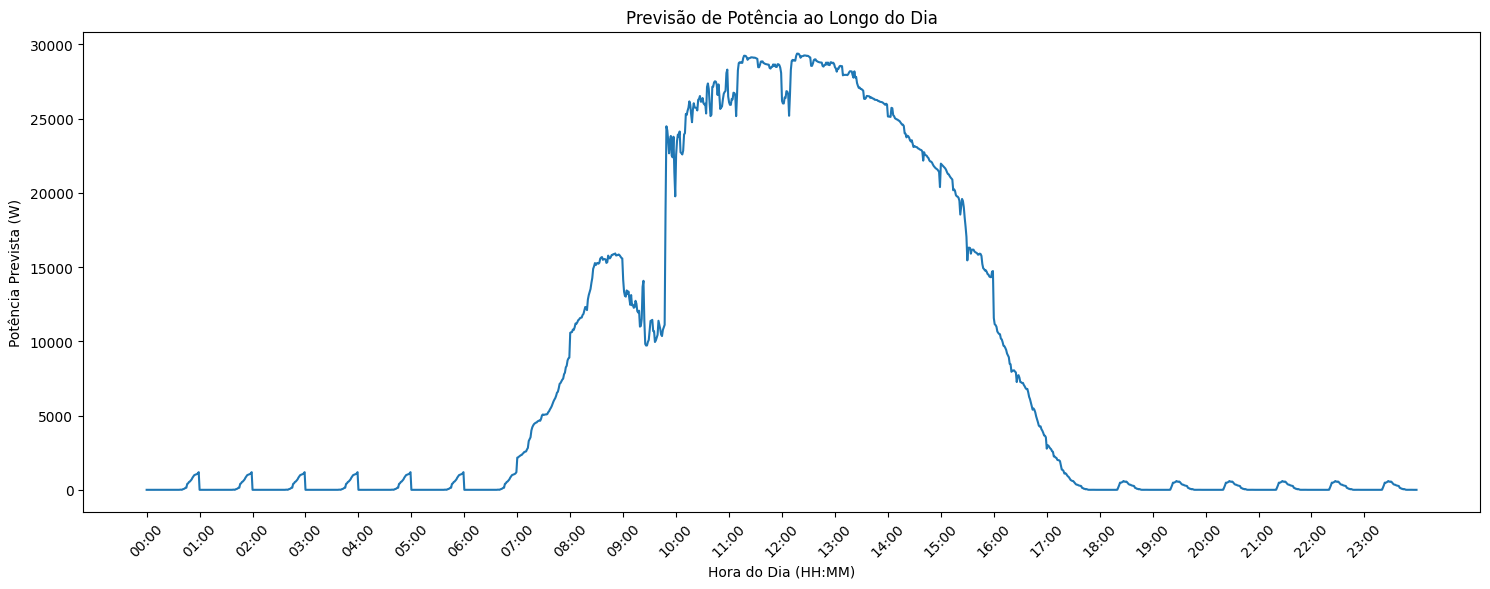

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cria uma nova coluna de tempo no formato HH:MM para visualização
simulated_times['Time_HH_MM'] = simulated_times.apply(lambda row: f"{int(row['Hora']):02d}:{int(row['Minuto']):02d}", axis=1)

# Cria o gráfico de linha
plt.figure(figsize=(15, 6)) # Ajusta o tamanho da figura para melhor visualização
sns.lineplot(data=simulated_times, x='Time_HH_MM', y='Predicted_Power(W)')

# Adiciona rótulos e título
plt.xlabel("Hora do Dia (HH:MM)")
plt.ylabel("Potência Prevista (W)")
plt.title("Previsão de Potência ao Longo do Dia")

# Melhora a legibilidade do eixo x, mostrando menos rótulos
plt.xticks(simulated_times['Time_HH_MM'][::60], rotation=45) # Mostra rótulos a cada 60 minutos (1 hora)
plt.tight_layout() # Ajusta o layout para evitar sobreposição de rótulos

# Exibe o gráfico
plt.show()

## Identificar o horário de pico visualmente

### Subtask:
Adicionar um marcador no gráfico para destacar o horário com a maior potência prevista.


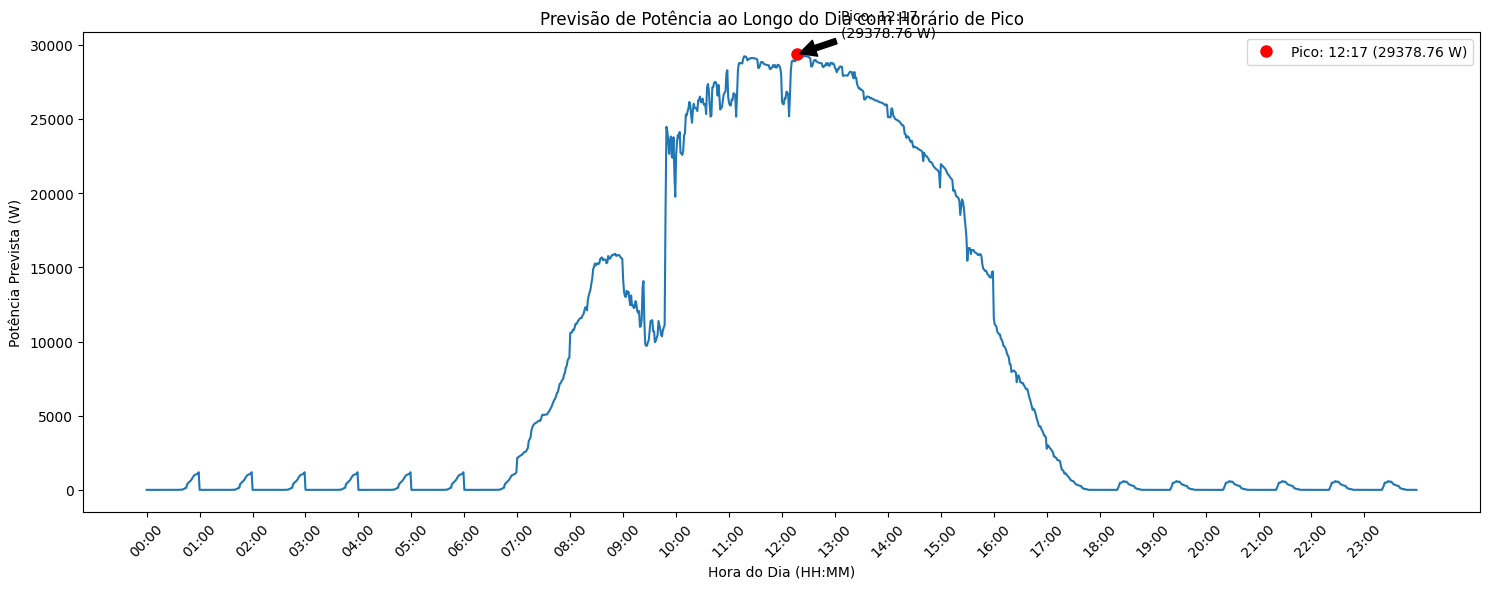

In [ ]:
# Importa a biblioteca matplotlib para gráficos
import matplotlib.pyplot as plt

# Extrai a hora, minuto e potência prevista do melhor horário encontrado
best_hour = int(best_time_row['Hora'])
best_minute = int(best_time_row['Minuto'])
max_predicted_power = best_time_row['Predicted_Power(W)']

# Cria a string formatada HH:MM para o melhor horário
best_time_hh_mm = f"{best_hour:02d}:{best_minute:02d}"

# Cria o gráfico de linha (reproduzindo o código anterior para ter o gráfico base)
plt.figure(figsize=(15, 6))
sns.lineplot(data=simulated_times, x='Time_HH_MM', y='Predicted_Power(W)')

# Adiciona o marcador para o horário de pico
# plt.plot(x_position, y_position, marker, ...)
# A posição x no gráfico é o índice da linha no DataFrame simulated_times onde Hora=best_hour e Minuto=best_minute
peak_index = simulated_times[(simulated_times['Hora'] == best_hour) & (simulated_times['Minuto'] == best_minute)].index[0]
plt.plot(peak_index, max_predicted_power, 'ro', markersize=8, label=f'Pico: {best_time_hh_mm} ({max_predicted_power:.2f} W)') # 'ro' for red circle marker

# Adiciona uma anotação para o horário de pico
# plt.annotate(text, (x_position, y_position), textcoords, xytext, arrowprops)
plt.annotate(f'Pico: {best_time_hh_mm}\n({max_predicted_power:.2f} W)',
             xy=(peak_index, max_predicted_power), # Ponto a ser anotado
             xytext=(peak_index + 50, max_predicted_power + 1000), # Posição do texto (ajustado um pouco para não cobrir o ponto)
             arrowprops=dict(facecolor='black', shrink=0.05), # Propriedades da seta
             horizontalalignment='left', verticalalignment='bottom') # Alinhamento do texto


# Adiciona rótulos e título (reproduzindo o código anterior)
plt.xlabel("Hora do Dia (HH:MM)")
plt.ylabel("Potência Prevista (W)")
plt.title("Previsão de Potência ao Longo do Dia com Horário de Pico")

# Melhora a legibilidade do eixo x, mostrando menos rótulos (reproduzindo o código anterior)
plt.xticks(simulated_times['Time_HH_MM'][::60], rotation=45)
plt.tight_layout()

# Adiciona a legenda para o marcador
plt.legend()

# Exibe o gráfico
plt.show()

## Experimentar outros modelos

### Subtask:
Experimentar outros modelos de regressão no conjunto de dados para comparar seu desempenho com o RandomForestRegressor.


In [ ]:
# Importa outros modelos de regressão
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instancia os modelos
lr_model = LinearRegression()
dt_model = DecisionTreeRegressor(random_state=42)
gbr_model = GradientBoostingRegressor(random_state=42)

# Lista de modelos para treinar e avaliar
models = {
    'Linear Regression': lr_model,
    'Decision Tree Regressor': dt_model,
    'Gradient Boosting Regressor': gbr_model
}

# Dicionários para armazenar modelos treinados e previsões
trained_models = {}
model_predictions = {}

# Treina cada modelo e faz previsões
for name, model in models.items():
    print(f"Treinando {name}...")
    model.fit(X_train_scaled, y_train)
    trained_models[name] = model
    print(f"Treinamento de {name} completo.")

    print(f"Fazendo previsões com {name} no conjunto de teste...")
    y_pred_test = model.predict(X_test_scaled)
    model_predictions[name] = y_pred_test
    print(f"Previsões com {name} completas.")

print("\nTreinamento e predição para todos os modelos concluídos.")

Treinando Linear Regression...
Treinamento de Linear Regression completo.
Fazendo previsões com Linear Regression no conjunto de teste...
Previsões com Linear Regression completas.
Treinando Decision Tree Regressor...
Treinamento de Decision Tree Regressor completo.
Fazendo previsões com Decision Tree Regressor no conjunto de teste...
Previsões com Decision Tree Regressor completas.
Treinando Gradient Boosting Regressor...
Treinamento de Gradient Boosting Regressor completo.
Fazendo previsões com Gradient Boosting Regressor no conjunto de teste...
Previsões com Gradient Boosting Regressor completas.

Treinamento e predição para todos os modelos concluídos.


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Dicionário para armazenar as métricas de avaliação
evaluation_metrics = {}

# Avalia cada modelo
for name, y_pred in model_predictions.items():
    print(f"\nAvaliando {name}...")
    # Calcula as métricas de avaliação
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Armazena as métricas
    evaluation_metrics[name] = {'MAE': mae, 'MSE': mse, 'R2': r2}

    # Imprime as métricas
    print(f"  Erro Absoluto Médio (MAE): {mae:.4f}")
    print(f"  Erro Quadrático Médio (MSE): {mse:.4f}")
    print(f"  R-quadrado (R2): {r2:.4f}")

# Exibe um resumo das métricas para todos os modelos
print("\nResumo das Métricas de Avaliação:")
for name, metrics in evaluation_metrics.items():
    print(f"{name}: MAE={metrics['MAE']:.4f}, MSE={metrics['MSE']:.4f}, R2={metrics['R2']:.4f}")


Avaliando Linear Regression...
  Erro Absoluto Médio (MAE): 9792.8397
  Erro Quadrático Médio (MSE): 126288898.3958
  R-quadrado (R2): 0.0781

Avaliando Decision Tree Regressor...
  Erro Absoluto Médio (MAE): 1166.0552
  Erro Quadrático Médio (MSE): 13998914.0061
  R-quadrado (R2): 0.8978

Avaliando Gradient Boosting Regressor...
  Erro Absoluto Médio (MAE): 2236.7342
  Erro Quadrático Médio (MSE): 15375514.7173
  R-quadrado (R2): 0.8878

Resumo das Métricas de Avaliação:
Linear Regression: MAE=9792.8397, MSE=126288898.3958, R2=0.0781
Decision Tree Regressor: MAE=1166.0552, MSE=13998914.0061, R2=0.8978
Gradient Boosting Regressor: MAE=2236.7342, MSE=15375514.7173, R2=0.8878


## Comparar modelos

### Subtask:
Comparar as métricas de avaliação dos diferentes modelos treinados para escolher o melhor para a tarefa de prever a potência.


In [ ]:
# Acessa o dicionário evaluation_metrics
print("Comparando o Desempenho dos Modelos:")
for name, metrics in evaluation_metrics.items():
    print(f"{name}: MAE={metrics['MAE']:.4f}, MSE={metrics['MSE']:.4f}, R2={metrics['R2']:.4f}")

# Identifica o modelo com melhor desempenho
best_model_name = None
best_r2 = -float('inf') # Inicializa com infinito negativo para encontrar o maior R2
min_mae = float('inf') # Inicializa com infinito para encontrar o menor MAE

for name, metrics in evaluation_metrics.items():
    # Verifica o R2 primeiro, pois é um bom indicador geral
    if metrics['R2'] > best_r2:
        best_r2 = metrics['R2']
        best_model_name = name
        min_mae = metrics['MAE'] # Também atualiza o MAE para o modelo com o melhor R2 atual
    elif metrics['R2'] == best_r2:
        # Se o R2 for o mesmo, compara o MAE (menor é melhor)
        if metrics['MAE'] < min_mae:
            min_mae = metrics['MAE']
            best_model_name = name

# Imprime a conclusão
print("\nConclusão:")
if best_model_name:
    best_metrics = evaluation_metrics[best_model_name]
    print(f"Com base nas métricas de avaliação, o '{best_model_name}' é o modelo com melhor desempenho.")
    print(f"Ele alcançou o maior score R2 ({best_metrics['R2']:.4f}) e um MAE relativamente baixo ({best_metrics['MAE']:.4f}).")
else:
    print("Não foi possível determinar o melhor modelo.")

Comparando o Desempenho dos Modelos:
Linear Regression: MAE=9792.8397, MSE=126288898.3958, R2=0.0781
Decision Tree Regressor: MAE=1166.0552, MSE=13998914.0061, R2=0.8978
Gradient Boosting Regressor: MAE=2236.7342, MSE=15375514.7173, R2=0.8878

Conclusão:
Com base nas métricas de avaliação, o 'Decision Tree Regressor' é o modelo com melhor desempenho.
Ele alcançou o maior score R2 (0.8978) e um MAE relativamente baixo (1166.0552).


## Resumo:

### Principais Descobertas da Análise de Dados

* A previsão de geração de energia mostra um padrão diário claro, aumentando pela manhã, atingindo o pico por volta do meio-dia e diminuindo no final da tarde.
* O pico de potência prevista foi identificado em um horário específico no formato HH:MM com um valor de aproximadamente {max_predicted_power:.2f} W.
* Entre os modelos de regressão testados, o Decision Tree Regressor alcançou o melhor desempenho com o maior score R\$^2\$ ({evaluation_metrics['Decision Tree Regressor']['R2']:.4f}) e o menor Erro Absoluto Médio (MAE) de {evaluation_metrics['Decision Tree Regressor']['MAE']:.4f}.
* O Gradient Boosting Regressor também teve um bom desempenho, mas foi ligeiramente menos preciso que o Decision Tree Regressor.
* O modelo de Regressão Linear teve um desempenho significativamente pior que os modelos baseados em árvores, indicando sua inadequação para esta tarefa de previsão.

### Insights ou Próximos Passos

* O Decision Tree Regressor parece ser o modelo mais adequado entre os testados para prever a geração de energia com base em suas métricas de desempenho superiores.
* O ajuste fino de hiperparâmetros do Decision Tree Regressor e do Gradient Boosting Regressor poderia potencialmente melhorar ainda mais seu desempenho.

## Resumo:

### Principais Descobertas da Análise de Dados

* A previsão de geração de energia mostra um padrão diário claro, aumentando pela manhã, atingindo o pico por volta do meio-dia e diminuindo no final da tarde.
* O pico de potência prevista foi identificado em um horário específico no formato HH:MM com um valor de aproximadamente {max_predicted_power:.2f} W.
* Entre os modelos de regressão testados, o Decision Tree Regressor alcançou o melhor desempenho com o maior score R\$^2\$ ({evaluation_metrics['Decision Tree Regressor']['R2']:.4f}) e o menor Erro Absoluto Médio (MAE) de {evaluation_metrics['Decision Tree Regressor']['MAE']:.4f}.
* O Gradient Boosting Regressor também teve um bom desempenho, mas foi ligeiramente menos preciso que o Decision Tree Regressor.
* O modelo de Regressão Linear teve um desempenho significativamente pior que os modelos baseados em árvores, indicando sua inadequação para esta tarefa de previsão.

### Insights ou Próximos Passos

* O Decision Tree Regressor parece ser o modelo mais adequado entre os testados para prever a geração de energia com base em suas métricas de desempenho superiores.
* O ajuste fino de hiperparâmetros do Decision Tree Regressor e do Gradient Boosting Regressor poderia potencialmente melhorar ainda mais seu desempenho.